# Data Wrangling
<br>

Let's import all the libraries and load the dataset

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display the plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

In [2]:
# Load online transactions data from CSV
df = pd.read_csv('project_files/int_online_tx.csv')

Next let's explore the dataset

In [3]:
# Dataframe dmensions
df.shape

(35116, 8)

In [4]:
# Display the first 10 rows of the dataset
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/10 8:45,0.85,12583.0,France
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/10 8:45,1.25,12583.0,France
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/10 8:45,2.95,12583.0,France
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/10 8:45,2.95,12583.0,France
9,536370,22629,SPACEBOY LUNCH BOX,24,12/1/10 8:45,1.95,12583.0,France


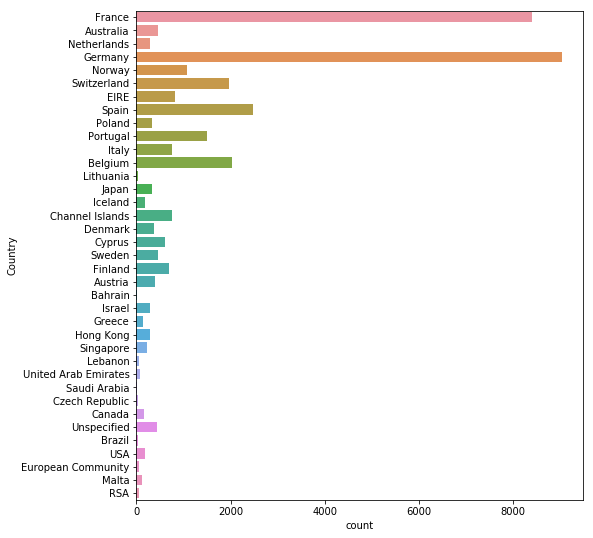

In [5]:
# Plot the Country distribution
plt.figure(figsize=(8,9))

# Bar plot by country
sns.countplot(y='Country', data=df)

Now that we have some visibility of the data we are dealing with, let's go ahead and clean the data.

In [6]:
# List missing data by feature
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1418
Country           0
dtype: int64

Let's drop customerID with missing data.

In [7]:
# Let's drop missing customerID's
df = df[df.CustomerID.notnull()]

In [8]:
# Convert customer ID's into integers
df['CustomerID'] = df.CustomerID.astype(int)

# Display first 5 CustomerID's in the transaction dataset
df.CustomerID.head()

0    12583
1    12583
2    12583
3    12583
4    12583
Name: CustomerID, dtype: int32

Let's create some feature

In [9]:
# Create 'Sales' interaction feature
df['Sales'] = df.Quantity * df.UnitPrice

# Display first 5 Sales values in the transaction dataset
df.Sales.head()

0    90.0
1    90.0
2    45.0
3    10.2
4    15.6
Name: Sales, dtype: float64

Now Let's save the cleaned data.

In [10]:
# Save cleaned transaction level data
df.to_csv('project_files/cleaned_transactions.csv',index=None)

Now let's engineer some features at the customer level

In [23]:
# Aggegrate invoice data
invoice_data = df.groupby('CustomerID').InvoiceNo.agg({ 'total_transactions' : 'nunique' })

# Display invoice data for first 5 customers
invoice_data.head()

c:\users\saed\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,total_transactions
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8


In [24]:
# Aggregate product data
product_data = df.groupby('CustomerID').StockCode.agg( { 'total_products' : 'count', 
                                                     'total_unique_products' : 'nunique' } )

# Display product data for first 5 customers
product_data.head()

c:\users\saed\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,total_products,total_unique_products
CustomerID,,
12347,182,103
12348,31,22
12349,73,73
12350,17,17
12352,85,59


In [25]:
# Roll up sales data
sales_data = df.groupby('CustomerID').Sales.agg( { 'total_sales' : 'sum', 
                                                  'avg_product_value' : 'mean' } )

# Display sales data for first 5 customers
sales_data.head()

c:\users\saed\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,total_sales,avg_product_value
CustomerID,,
12347,4310.00,23.681319
12348,1797.24,57.975484
12349,1757.55,24.076027
12350,334.40,19.670588
12352,2506.04,29.482824
